# PREDIKSI HUJAN DIDAERAH DKI JAKARTA MUNGGUNAKAN METODE LSTM MULTI STEP

# Latar Belakang

Prediksi hujan atau prediksi cuaca secara umum adalah salah satu cabang dari ilmu meteorologi yang bertujuan untuk memprediksi kondisi atmosfer pada masa depan berdasarkan data historis dan pengamatan yang ada. Salah satu tantangan utama dalam dunia meteorologi adalah memprediksi kapan dan di mana hujan akan terjadi. Keakuratan prediksi hujan sangat penting, terutama dalam konteks manajemen risiko bencana, pertanian, dan perencanaan infrastruktur.

# Tujuan

1. Mengembangkan model prediksi Hujan di daerah DKI Jakarta menggunakan metode Decision Tree multistep, yang dapat memproyeksikan Hujan dalam beberapa langkah waktu ke depan.
2. Memberika hasil prediksi yang diperoleh.





# Data Understanding

Pada Project 3 ini saya mengambil Data Hujan wilayah DKI Jakarta yang mempunyai Fitur Curah Hujan, Kelembapan Rata rata, Kecepatang Anging rata rata yang mana data ini saya dapatkan melalui Website BMKG yang terletak pada data Harian

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
import pandas as pd

# Path ke file dataset Anda
dataset_path = 'datahujan.xlsx'  # Ganti dengan path yang benar jika diperlukan

# Membaca dataset
df = pd.read_excel(dataset_path)

# Tampilkan 5 baris pertama
print(df.head())


      Tanggal  Kelembapan Rata Rata  (RH_avg)  Curah Hujan (RR)  \
0  01-01-2023                            87.0              14.5   
1  02-01-2023                            81.0              31.5   
2  03-01-2023                            82.0               0.5   
3  04-01-2023                            86.0               2.4   
4  05-01-2023                            83.0              35.3   

   Kecepatan Angin Rata Rata(ff_avg)  
0                                1.0  
1                                2.0  
2                                1.0  
3                                1.0  
4                                2.0  


# Menampilkan Data

In [6]:
df_train = pd.read_excel('datahujan.xlsx')
df_train

,Tanggal,Kelembapan Rata Rata (RH_avg),Curah Hujan (RR),Kecepatan Angin Rata Rata(ff_avg)
0,01-01-2023,87.0,14.5,1.0
1,02-01-2023,81.0,31.5,2.0
2,03-01-2023,82.0,0.5,1.0
3,04-01-2023,86.0,2.4,1.0
4,05-01-2023,83.0,35.3,2.0
...,...,...,...,...
146,27-05-2023,78.0,NaN,2.0
147,28-05-2023,80.0,16.6,1.0
148,29-05-2023,78.0,0.0,2.0
149,30-05-2023,77.0,0.0,2.0


In [7]:
df = pd.read_excel('datahujan.xlsx')
df.isnull().sum()

,0
Tanggal,0
Kelembapan Rata Rata (RH_avg),1
Curah Hujan (RR),33
Kecepatan Angin Rata Rata(ff_avg),1


In [8]:
# Melihat jumlah missing value di setiap kolom
print(df_train.isnull().sum())

# Melihat persentase missing value di setiap kolom
print((df_train.isnull().sum() / len(df_train)) * 100)


Tanggal                               0
Kelembapan Rata Rata  (RH_avg)        1
Curah Hujan (RR)                     33
Kecepatan Angin Rata Rata(ff_avg)     1
dtype: int64
Tanggal                               0.000000
Kelembapan Rata Rata  (RH_avg)        0.662252
Curah Hujan (RR)                     21.854305
Kecepatan Angin Rata Rata(ff_avg)     0.662252
dtype: float64


In [9]:
# Hapus baris dengan missing value
df_cleaned = df_train.dropna()

# Hapus kolom dengan missing value
df_cleaned = df_train.dropna(axis=1)


In [11]:
# Isi missing value dengan mean (rata-rata)
df_train['Kelembapan Rata Rata  (RH_avg)'] = df_train['Curah Hujan (RR)'].fillna(df_train['Kecepatan Angin Rata Rata(ff_avg)'].mean())

# Isi missing value dengan median
df_train['Kelembapan Rata Rata  (RH_avg)'] = df_train['Curah Hujan (RR)'].fillna(df_train['Kecepatan Angin Rata Rata(ff_avg)'].median())

# Isi missing value dengan mode (paling sering muncul)
df_train['Kelembapan Rata Rata  (RH_avg)'] = df_train['Curah Hujan (RR)'].fillna(df_train['Kecepatan Angin Rata Rata(ff_avg)'].mode()[0])


In [13]:
print(df_train.isnull().sum())


Tanggal                               0
Kelembapan Rata Rata  (RH_avg)        0
Curah Hujan (RR)                     33
Kecepatan Angin Rata Rata(ff_avg)     1
dtype: int64


# Eksplorasi data

In [14]:
df = pd.read_excel('datahujan.xlsx')
df.describe()

,Kelembapan Rata Rata (RH_avg),Curah Hujan (RR),Kecepatan Angin Rata Rata(ff_avg)
count,150.000000,118.000000,150.000000
mean,78.940000,1742.261017,1.593333
std,5.565027,3531.037539,0.920291
min,65.000000,0.000000,0.000000
25%,75.250000,0.000000,1.000000
50%,78.500000,9.500000,1.000000
75%,82.000000,42.075000,2.000000
max,94.000000,8888.000000,6.000000


# Distribusi Data

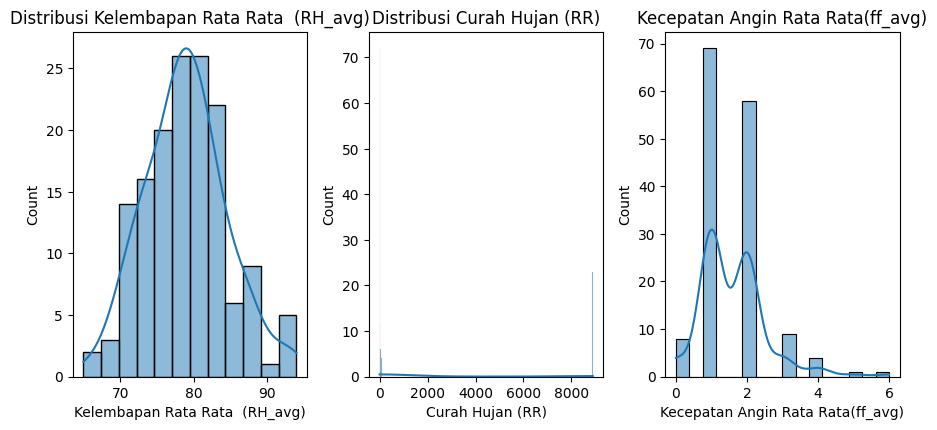

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset (gantilah dengan path yang sesuai jika belum dimuat)
df = pd.read_excel('datahujan.xlsx')

# Menentukan ukuran plot
plt.figure(figsize=(12, 8))

# Menampilkan distribusi Kelembapan_RH_avg
plt.subplot(2, 4, 1)
sns.histplot(df['Kelembapan Rata Rata  (RH_avg)'], kde=True)
plt.title('Distribusi Kelembapan Rata Rata  (RH_avg)')

# Menampilkan distribusi Curah_Hujan_RR
plt.subplot(2, 4, 2)
sns.histplot(df['Curah Hujan (RR)'], kde=True)
plt.title('Distribusi Curah Hujan (RR)')

# Menampilkan distribusi Kecepatan_Angin_ff_avg
plt.subplot(2, 4, 3)
sns.histplot(df['Kecepatan Angin Rata Rata(ff_avg)'], kde=True)
plt.title('Kecepatan Angin Rata Rata(ff_avg)')


# Menampilkan plot
plt.tight_layout()
plt.show()


In [17]:
print("Nama kolom dalam dataset:", df.columns.tolist())

Nama kolom dalam dataset: ['Tanggal', 'Kelembapan Rata Rata  (RH_avg)', 'Curah Hujan (RR)', 'Kecepatan Angin Rata Rata(ff_avg)']


In [18]:

# Memastikan kolom yang diperlukan ada
required_columns = ['Kelembapan Rata Rata  (RH_avg)', 'Curah Hujan (RR)', 'Kecepatan Angin Rata Rata(ff_avg)']
df = df[required_columns]

# Menghapus missing values
df.dropna(inplace=True)

<ipython-input-18-d4f37bf8575b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


<Axes: >

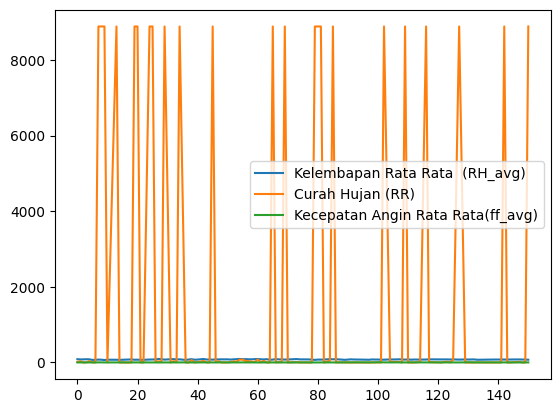

In [19]:
df.plot()

# EDA

In [20]:
df.info()  # Menampilkan informasi umum mengenai DataFrame, termasuk jumlah entri, jumlah kolom, tipe data setiap kolom, dan apakah ada nilai kosong (non-null).
print('Ukuran data ', df.shape)  # Menampilkan ukuran data dalam format tuple (jumlah baris, jumlah kolom).
df.dtypes  # Menampilkan tipe data dari setiap kolom dalam DataFrame.


<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 150
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Kelembapan Rata Rata  (RH_avg)     117 non-null    float64
 1   Curah Hujan (RR)                   117 non-null    float64
 2   Kecepatan Angin Rata Rata(ff_avg)  117 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB
Ukuran data  (117, 3)


,0
Kelembapan Rata Rata (RH_avg),float64
Curah Hujan (RR),float64
Kecepatan Angin Rata Rata(ff_avg),float64


# Korelasi Antar Fitur

Matriks Korelasi:
                                   Kelembapan Rata Rata  (RH_avg)  \
Kelembapan Rata Rata  (RH_avg)                           1.000000   
Curah Hujan (RR)                                        -0.334829   
Kecepatan Angin Rata Rata(ff_avg)                       -0.243184   

                                   Curah Hujan (RR)  \
Kelembapan Rata Rata  (RH_avg)            -0.334829   
Curah Hujan (RR)                           1.000000   
Kecepatan Angin Rata Rata(ff_avg)         -0.117732   

                                   Kecepatan Angin Rata Rata(ff_avg)  
Kelembapan Rata Rata  (RH_avg)                             -0.243184  
Curah Hujan (RR)                                           -0.117732  
Kecepatan Angin Rata Rata(ff_avg)                           1.000000  


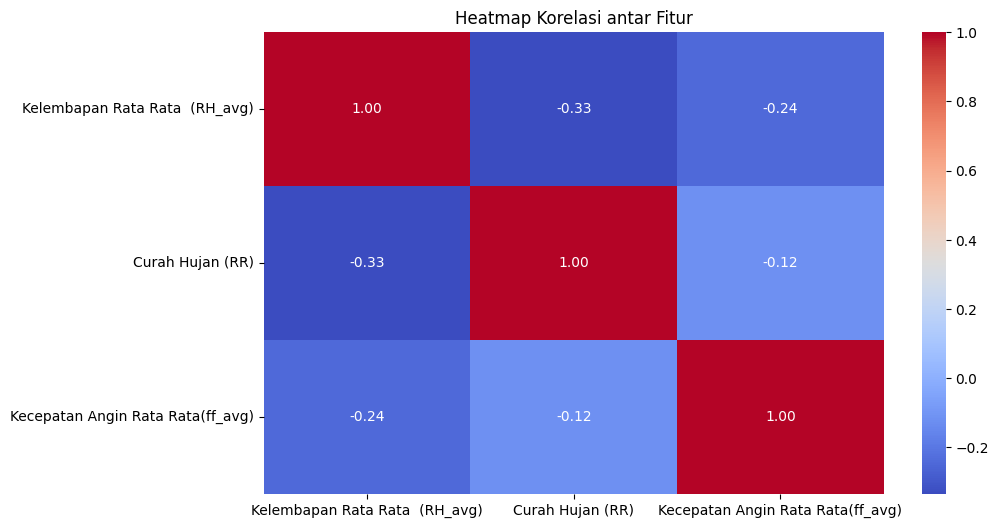

In [22]:
import seaborn as sns
# Menghitung korelasi antar fitur untuk subset yang diinginkan
features = df[['Kelembapan Rata Rata  (RH_avg)', 'Curah Hujan (RR)', 'Kecepatan Angin Rata Rata(ff_avg)']]
correlation_matrix = features.corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

# Menggambar heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 6))
plt.title("Heatmap Korelasi antar Fitur")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Kesimpulan:

Kelembapan dan Curah Hujan: Ada hubungan negatif moderat antara kelembapan udara dan curah hujan, tetapi hubungan ini tidak terlalu kuat. Banyak faktor lain yang berperan dalam menentukan curah hujan.

Kelembapan dan Kecepatan Angin: Korelasi negatif lemah menunjukkan bahwa ada kecenderungan kelembapan tinggi berhubungan dengan kecepatan angin yang lebih rendah, meskipun ini tidak signifikan.

Curah Hujan dan Kecepatan Angin: Tidak ada korelasi yang signifikan antara curah hujan dan kecepatan angin, artinya faktor angin tidak memiliki pengaruh yang jelas terhadap curah hujan dalam dataset ini.

In [23]:
# Deskripsi Statistik
df.describe()

,Kelembapan Rata Rata (RH_avg),Curah Hujan (RR),Kecepatan Angin Rata Rata(ff_avg)
count,117.000000,117.000000,117.000000
mean,79.350427,1757.152137,1.564103
std,5.767501,3542.501838,0.922745
min,65.000000,0.000000,0.000000
25%,76.000000,0.000000,1.000000
50%,79.000000,9.500000,1.000000
75%,83.000000,42.500000,2.000000
max,94.000000,8888.000000,6.000000


# Processing Data

# Sliding Windows

In [24]:
import numpy as np
import pandas as pd

# Fungsi untuk membuat sliding windows
def create_sliding_windows(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Menyiapkan data untuk sliding windows
window_size = 3  # Ukuran window
data_values = df[['Kelembapan Rata Rata  (RH_avg)', 'Curah Hujan (RR)', 'Kecepatan Angin Rata Rata(ff_avg)']].values  # Menggunakan kolom data
X, y = create_sliding_windows(data_values, window_size)

# Buat nama kolom sesuai jumlah fitur dan window size
feature_names = ['Kelembapan Rata Rata  (RH_avg)', 'Curah Hujan (RR)', 'Kecepatan Angin Rata Rata(ff_avg)']
columns = [f'{feature}_t-{window_size-j}' for j in range(window_size) for feature in feature_names]

# Membuat DataFrame
sliding_window_df = pd.DataFrame(X.reshape(X.shape[0], -1), columns=columns)

# Menambahkan target ke DataFrame
sliding_window_df['Target_Hujan_t'] = y[:, 0]  # Target untuk fitur pertama

# Menampilkan hasil
print(sliding_window_df.head())


   Kelembapan Rata Rata  (RH_avg)_t-3  Curah Hujan (RR)_t-3  \
0                                87.0                  14.5   
1                                81.0                  31.5   
2                                82.0                   0.5   
3                                86.0                   2.4   
4                                83.0                  35.3   

   Kecepatan Angin Rata Rata(ff_avg)_t-3  Kelembapan Rata Rata  (RH_avg)_t-2  \
0                                    1.0                                81.0   
1                                    2.0                                82.0   
2                                    1.0                                86.0   
3                                    1.0                                83.0   
4                                    2.0                                68.0   

   Curah Hujan (RR)_t-2  Kecepatan Angin Rata Rata(ff_avg)_t-2  \
0                  31.5                                    2.0   
1       

# Pemodelan

      Tanggal  Kelembapan Rata Rata  (RH_avg)  Curah Hujan (RR)  \
0  01-01-2023                            87.0              14.5   
1  02-01-2023                            81.0              31.5   
2  03-01-2023                            82.0               0.5   
3  04-01-2023                            86.0               2.4   
4  05-01-2023                            83.0              35.3   

   Kecepatan Angin Rata Rata(ff_avg)  
0                                1.0  
1                                2.0  
2                                1.0  
3                                1.0  
4                                2.0  
X shape: (90, 3)
y_multi shape: (90, 2)
===== Data Train =====
[[7.40740741e-01 1.63141314e-03 1.66666667e-01]
 [5.18518519e-01 3.54410441e-03 3.33333333e-01]
 [5.55555556e-01 5.62556256e-05 1.66666667e-01]
 [7.03703704e-01 2.70027003e-04 1.66666667e-01]
 [5.92592593e-01 3.97164716e-03 3.33333333e-01]
 [3.70370370e-02 2.58775878e-04 1.66666667e-01]
 [1.11111111

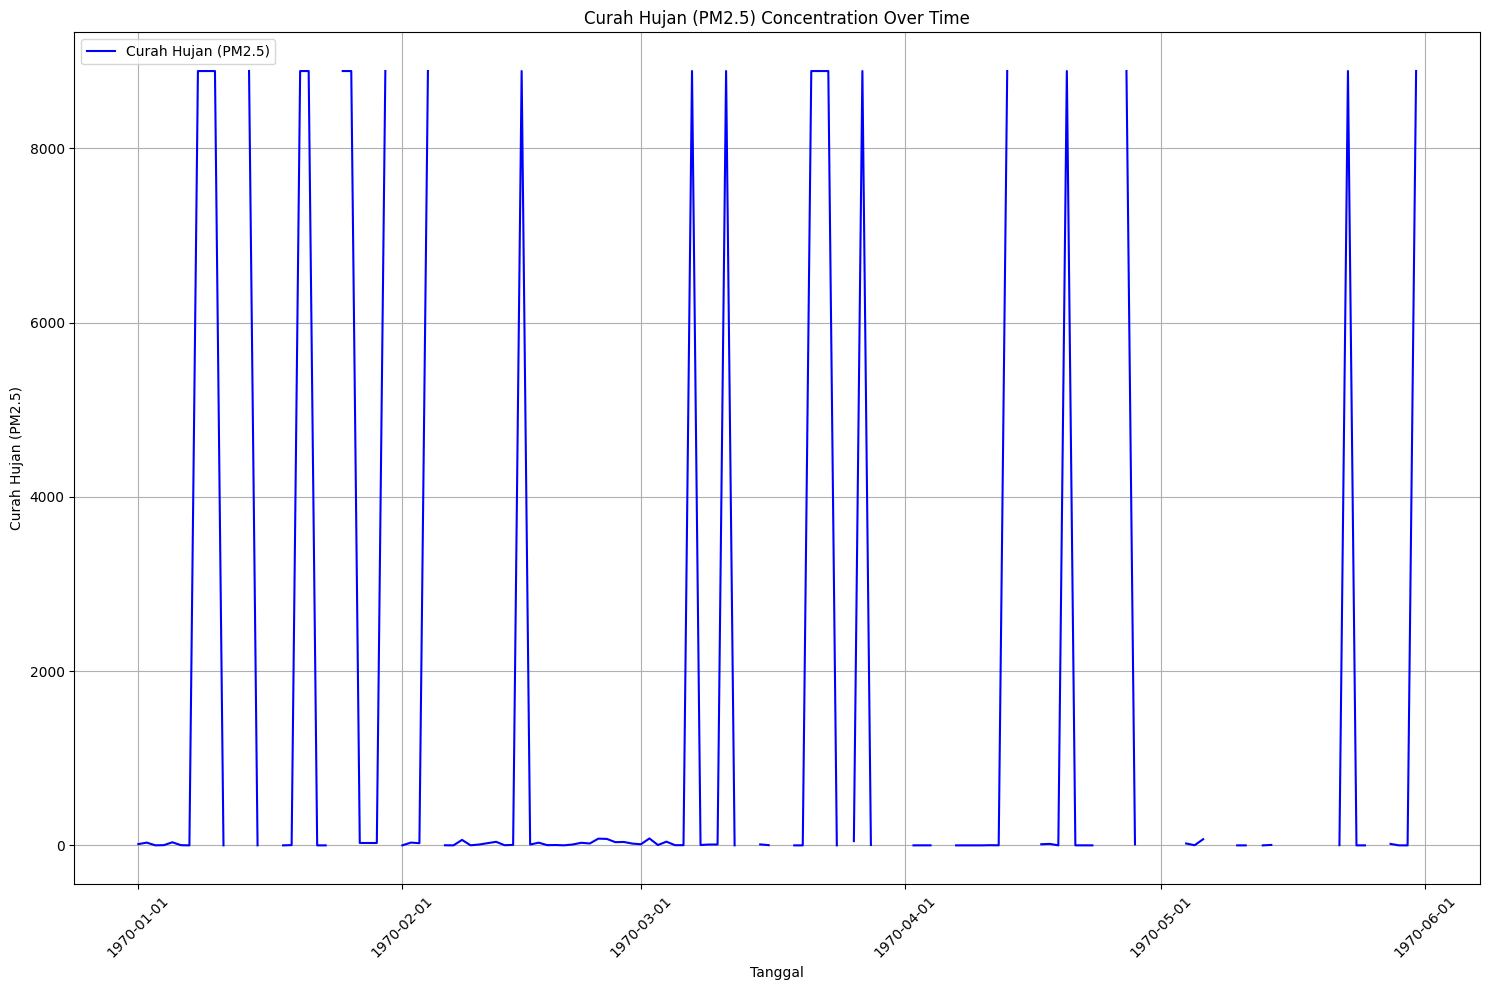

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

# Fungsi untuk membuat target yang digeser (multi-step forecasting)
def create_shifted_targets(data, steps):
    targets = []
    for step in range(1, steps + 1):
        targets.append(data.shift(-step))  # Geser data untuk langkah ke depan
    return pd.concat(targets, axis=1)

# Membaca dataset LSTM-Multivariate_pollution.csv
data = pd.read_excel('datahujan.xlsx')

# Memeriksa struktur dataset
print(data.head())

# Kolom yang relevan untuk fitur dan target
features = ['Kelembapan Rata Rata  (RH_avg)', 'Curah Hujan (RR)', 'Kecepatan Angin Rata Rata(ff_avg)']  # Fitur yang relevan
target = 'Curah Hujan (RR)'  # Target adalah konsentrasi curah hujan (misalnya, PM2.5 atau 'pollution')

# Membuat target yang digeser untuk multi-step forecasting
steps = 2  # Prediksi 2 langkah ke depan (t+1, t+2)
y_multi = create_shifted_targets(data[target], steps)

# Menghapus NaN dari target yang digeser dan X secara bersamaan
# This ensures X and y_multi have the same number of rows
X = data[features]
X = X[y_multi.notna().all(axis=1)] # select rows from X where y_multi is not NaN
y_multi = y_multi.dropna()

# Verifikasi panjang X dan y_multi sebelum pembagian data
print(f"X shape: {X.shape}")
print(f"y_multi shape: {y_multi.shape}")

# Normalisasi fitur (pollution, dew, temp, press, wnd_spd, snow, rain)
scaler_features = MinMaxScaler()
X = scaler_features.fit_transform(X)  # Fit and transform on X directly

# Normalisasi target (pollution)
scaler_target = MinMaxScaler()
y_multi = scaler_target.fit_transform(y_multi) # Fit and transform on y_multi directly


# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, shuffle=False)

# Verifikasi bahwa X_train dan X_test memiliki ukuran yang benar
print('===== Data Train =====')
print(X_train)

print('===== Data Testing ====')
print(X_test)


# Visualisasi harga Close dan High (menggunakan data polusi dalam hal ini)
plt.figure(figsize=(15, 10))


# Plot PM2.5 (pollution)
plt.plot(data.index, data['Curah Hujan (RR)'], label='Curah Hujan (PM2.5)', linestyle='-', color='blue')

# Format sumbu x agar menampilkan tanggal
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Menampilkan label tanggal per bulan

plt.title('Curah Hujan (PM2.5) Concentration Over Time')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (PM2.5)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Putar label tanggal agar tidak tumpang tindih
plt.tight_layout()
plt.show()

# Random Forest

Mean Squared Error (MSE): 0.21
Mean Absolute Error (MAE): 0.34
Root Mean Squared Error (RMSE): 0.46
R-squared (R²): -0.36


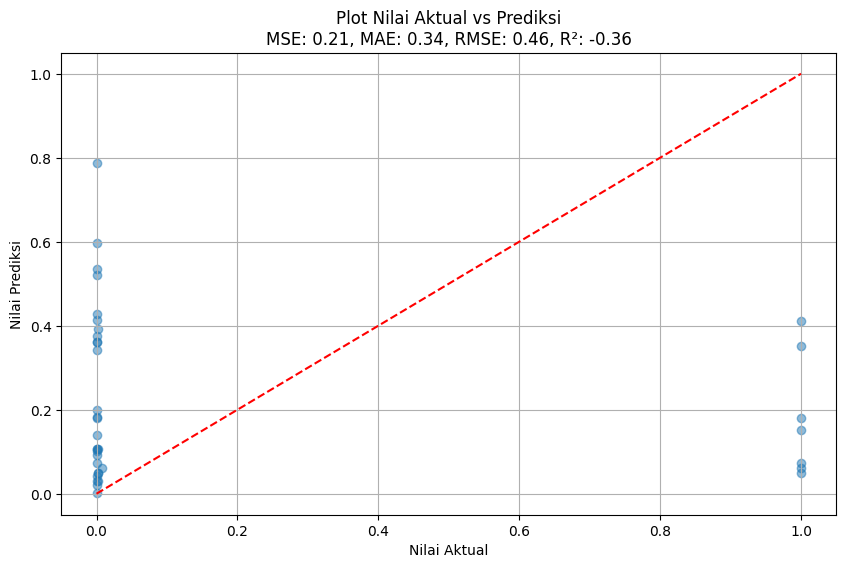

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Membuat model Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Memprediksi harga menggunakan model Random Forest
y_pred_rf = model_rf.predict(X_test)

# Menghitung evaluasi metrik
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Menampilkan evaluasi metrik
print(f'Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'R-squared (R²): {r2_rf:.2f}')

# Membuat plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis identitas
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title(f'Plot Nilai Aktual vs Prediksi\nMSE: {mse_rf:.2f}, MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}')
plt.grid()
plt.show()


# Decidion Tree

Mean Squared Error (MSE): 0.42
Mean Absolute Error (MAE): 0.42
Root Mean Squared Error (RMSE): 0.65
R-squared (R²): -1.73


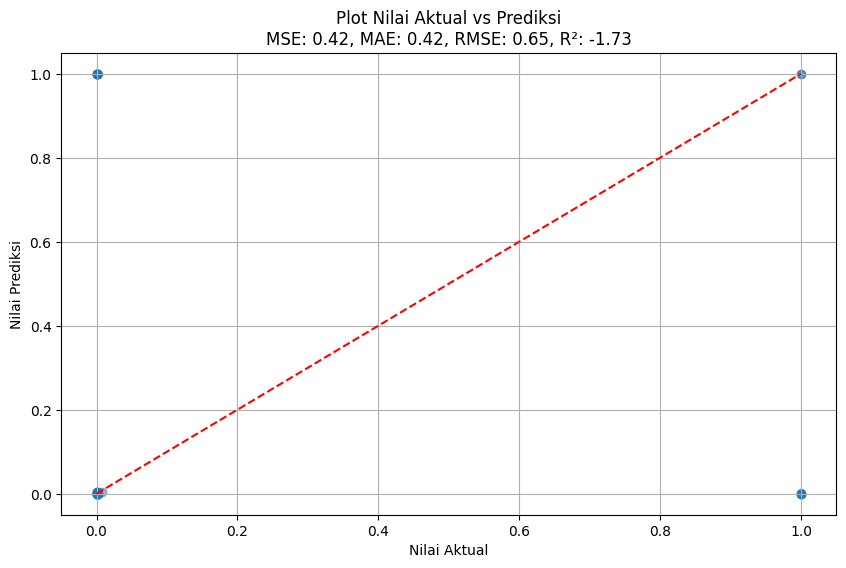

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Membuat model Decision Tree
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Memprediksi harga menggunakan model Decision Tree
y_pred_dt = model_dt.predict(X_test)

# Menghitung evaluasi metrik
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Menampilkan evaluasi metrik
print(f'Mean Squared Error (MSE): {mse_dt:.2f}')
print(f'Mean Absolute Error (MAE): {mae_dt:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_dt:.2f}')
print(f'R-squared (R²): {r2_dt:.2f}')

# Membuat plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis identitas
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title(f'Plot Nilai Aktual vs Prediksi\nMSE: {mse_dt:.2f}, MAE: {mae_dt:.2f}, RMSE: {rmse_dt:.2f}, R²: {r2_dt:.2f}')
plt.grid()
plt.show()


# Kesimpulan

Dapat disimpulkan dari beberapa model diatas yang mempunyai nilai error paling rendah adalah Model random Forest jadi pada model ini Random Forest adalah model yang paling baik